# Phenotype Correlation Analysis


# Table of contents

- [1 - Packages](#1)
- [2 - Grain Properies](#2)
- [3 - Grain weigth](#3)
- [4 - Grain length](#4)  
- [5 - Grain width](#5)
- [6 - Correlation Analysis](#6)
- [7 - Data processing for tassel](#7)
- [8 - Clustering analysis](#8)

<a name='1'></a>
# 1 - Packages


In [1]:
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering
import numpy as np

<a name='2'></a>
# 2 - Grain Properties


In [2]:
df=pd.read_csv("../../data/PhenotypeData/GrainPropertiesInVietnam.csv")
df

,RG_ID,NAME,IRIS ID,ACCESSION,SUBPOPULATION,COUNTRY,Grain weight,grain length,grain width
0,FCC0E5E.3,BA TUC RAN::IRGC 73239-1,IRIS 313-11895,IRGC 132391,ind3,Viet Nam,1.8,6.2,2.3
1,FCC0BTD.4,DAU NGHA THAI BINH::IRGC 82891-1,IRIS 313-12078,IRGC 127301,indx,Viet Nam,2.3,7.3,2.5
2,FCD054W.2,BAT DO::IRGC 7014-1,IRIS 313-8341,IRGC 121599,indx,Viet Nam,1.6,8.8,2.6
3,FCD0LYU.8,BONG SEN::IRGC 7011-1,IRIS 313-10554,IRGC 127235,ind3,Viet Nam,2.3,9.5,2.6
4,FCC0DF8.4,CA HIM::IRGC 73246-1,IRIS 313-11896,IRGC 132394,ind3,Viet Nam,2.6,7.6,2.6
5,FCD0LUF.7,CHAN THANH HOA::IRGC 60647-1,IRIS 313-11594,IRGC 127259,indx,Viet Nam,2.1,7.5,2.6
6,FCC0837.8,LUA CHAN HUONG::IRGC 16800-1,IRIS 313-9342,IRGC 126236,ind3,Viet Nam,2.5,9.2,2.6
7,FCD0LYE.6,LUA DUC::IRGC 16718-1,IRIS 313-10748,IRGC 127578,indx,Viet Nam,2.0,8.6,2.6
8,FCC0DAN.8,LUA HUONG T 1::IRGC 7082-2,IRIS 313-10555,IRGC 128098,ind3,Viet Nam,2.2,8.9,2.7
9,FCD0LYU.1,CHAM TON::IRGC 90600-1,IRIS 313-12210,IRGC 127257,indx,Viet Nam,1.9,7.0,2.8


<a name='3'></a>
# 3 - Grain weight


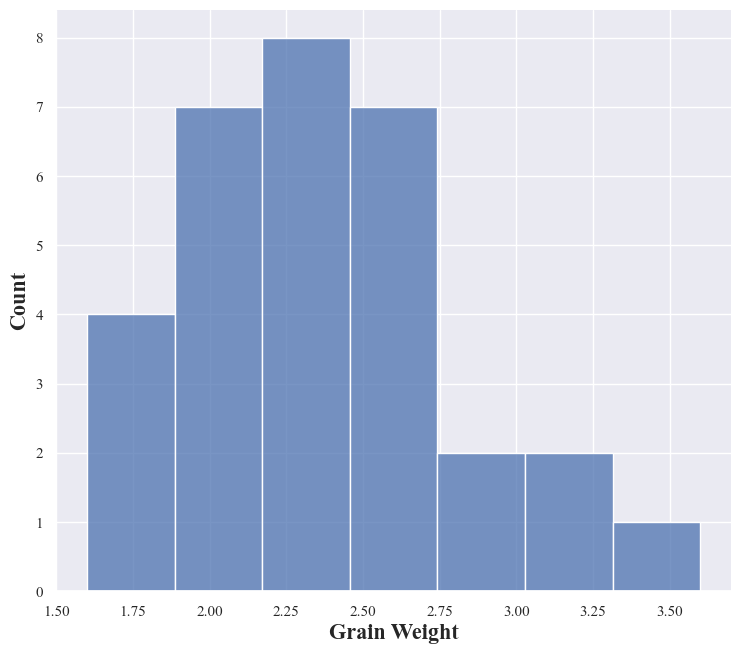

In [19]:
sns.set_theme()
sns.set(font_scale=1)
sns.set(font="Times New Roman")
distweight = sns.displot(df, x="Grain weight",bins=7)
distweight.fig.set_size_inches(8,7)
plt.xlabel('Grain Weight', fontsize=16, weight='bold')
plt.ylabel('Count', fontsize=16, weight='bold')
plt.savefig("../../result/Output_phenotype/GrainWeight.svg")
plt.savefig("../../result/Output_phenotype/GrainWeight.png", dpi=1000)

<a name='4'></a>
# 4 - Grain length


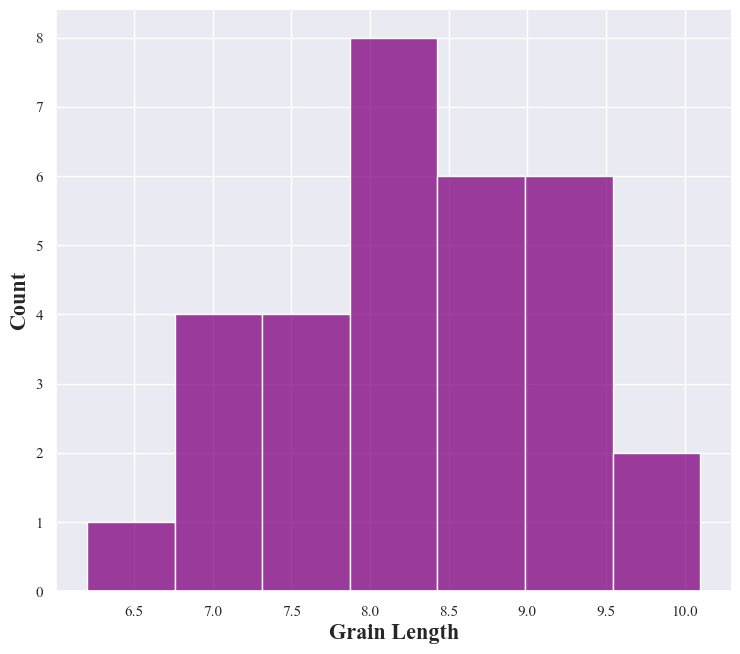

In [4]:
sns.set_theme()
sns.set(font_scale=1)
sns.set(font="Times New Roman")
distlength = sns.displot(df, x="grain length",
                         color="purple",
                         bins=7
                              )
distlength.fig.set_size_inches(8,7)
plt.xlabel('Grain Length', fontsize=16, weight='bold')
plt.ylabel('Count', fontsize=16, weight='bold')
plt.savefig("../../result/Output_phenotype/GrainLenght.svg")
plt.savefig("../../result/Output_phenotype/GrainLenght.png", dpi=1000)


<a name='5'></a>
# 5 - Grain width


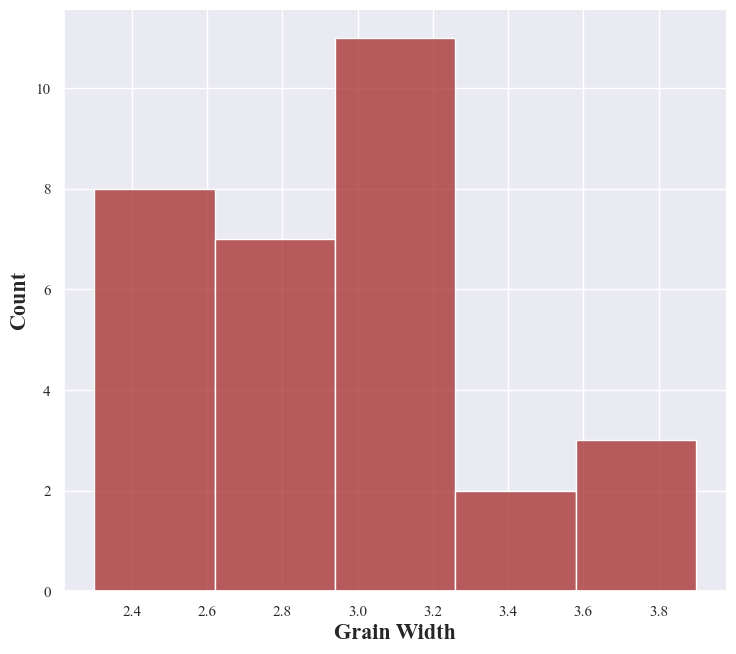

In [5]:
sns.set_theme()
sns.set(font_scale=1)
sns.set(font="Times New Roman")
distwidth = sns.displot(df, x="grain width",
                         bins=5,
                         color="brown"
                              )
distwidth.fig.set_size_inches(8,7)
plt.xlabel('Grain Width', fontsize=16, weight='bold')
plt.ylabel('Count', fontsize=16, weight='bold')
plt.savefig("../../result/Output_phenotype/GrainWidth.png", dpi=1000)

<a name='6'></a>
# 6 - Correlation analysis


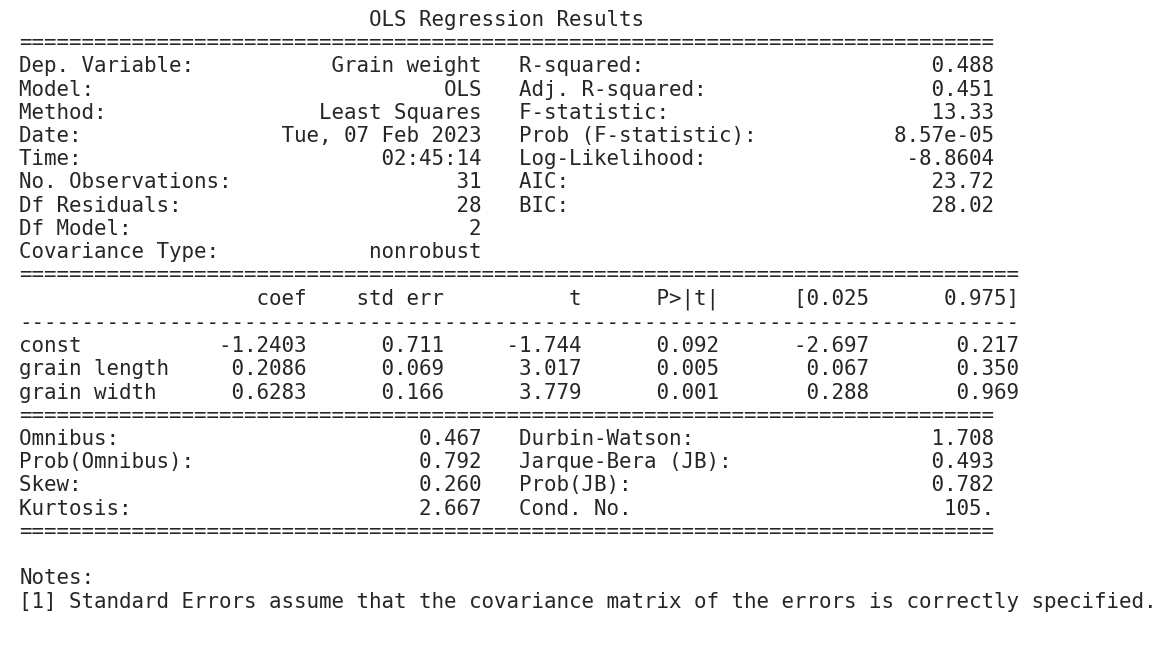

In [6]:
x = df[["grain length","grain width"]]
y = df["Grain weight"]
x = sm.add_constant(x)
model = sm.OLS(y,x)
res = model.fit()
res.summary()
plt.rc('figure', figsize=(12, 7))

plt.text(0.01, 0.05, str(res.summary()), {'fontsize': 15}, fontproperties = 'monospace') 
plt.axis('off')
plt.tight_layout()
plt.savefig('../../result/Output_phenotype/Regression_stats.svg')
plt.savefig('../../result/Output_phenotype/Regression_stats.png', dpi=1000)

In [7]:
df[["grain length","grain width"]].corr()

,grain length,grain width
grain length,1.000000,0.125422
grain width,0.125422,1.000000


<a name='7'></a>
# 7 - Data processing for Tassel


## Trait Data

In [22]:
df = pd.read_csv("../../data/PhenotypeData/GrainPropertiesInVietnam.csv")
tasselData = df.drop(
    columns=["IRIS ID", "NAME", "ACCESSION", "SUBPOPULATION", "COUNTRY"]
)
tasselData.rename(
    columns={
        "RG_ID": "<Trait>",
        "Grain weight": "GrainWeight",
        "grain length": "GrainLength",
        "grain width": "GrainWidth",
    },
    inplace=True,
    errors="raise",
)
tasselData["<Trait>"] = tasselData["<Trait>"].str.replace(" ", "-")
tasselData.to_csv(r"../../data/TasselData/traits.txt", index=None, sep=" ", mode="a")
tasselData

,<Trait>,GrainWeight,GrainLength,GrainWidth
0,FCC0E5E.3,1.8,6.2,2.3
1,FCC0BTD.4,2.3,7.3,2.5
2,FCD054W.2,1.6,8.8,2.6
3,FCD0LYU.8,2.3,9.5,2.6
4,FCC0DF8.4,2.6,7.6,2.6
5,FCD0LUF.7,2.1,7.5,2.6
6,FCC0837.8,2.5,9.2,2.6
7,FCD0LYE.6,2.0,8.6,2.6
8,FCC0DAN.8,2.2,8.9,2.7
9,FCD0LYU.1,1.9,7.0,2.8


<a name='8'></a>
# 8 - Clustering analysis


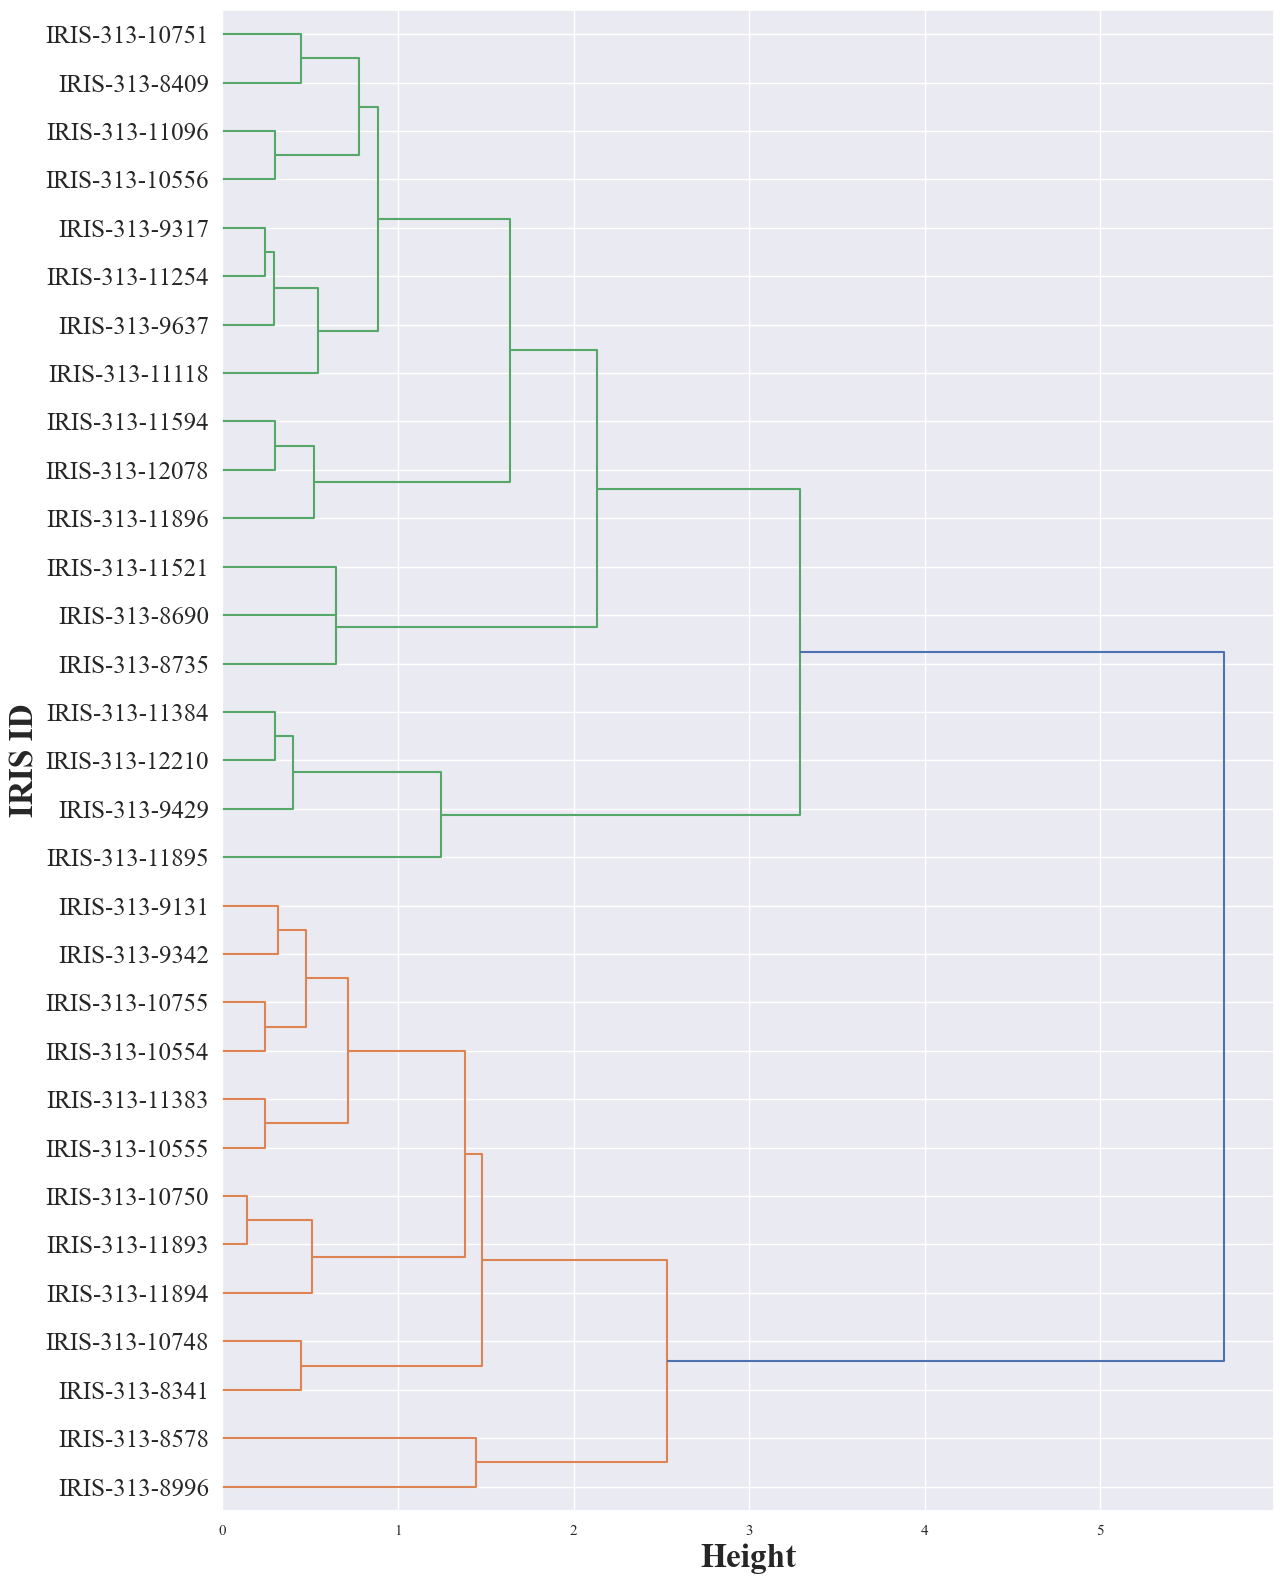

In [9]:
df=pd.read_csv("../../data/PhenotypeData/GrainPropertiesInVietnam.csv")
tasselData = df.drop(columns=["RG_ID","NAME","ACCESSION","SUBPOPULATION","COUNTRY"])
tasselData.rename(columns={"IRIS ID":"<Trait>",
                           "Grain weight":"GrainWeight",
                          "grain length":"GrainLength",
                          "grain width":"GrainWidth"},
                  inplace=True, errors='raise')
tasselData["<Trait>"]=tasselData["<Trait>"].str.replace(' ','-')

X = tasselData[["GrainWeight","GrainLength","GrainWidth"]]
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model = model.fit(X)
def llf(id):
    return f'{tasselData["<Trait>"][id]}'

def plot_dendrogram(model, **kwargs):
  
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1 
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)
    fig, ax = plt.subplots(figsize=(13, 16))  
    ax = dendrogram(linkage_matrix,leaf_label_func=llf, leaf_font_size=18,orientation="right")
    plt.xlabel('Height', fontsize=24, weight='bold')
    plt.ylabel('IRIS ID', fontsize=24, weight='bold')
    plt.tight_layout()
    plt.show()
    fig.savefig('../../result/Output_phenotype/PhenotypeDendrogram.svg')
    fig.savefig('../../result/Output_phenotype/PhenotypeDendrogram.png', dpi=1000)
plot_dendrogram(model, truncate_mode="level", p=7)